# MTH9879 Homework 9

Assigned: April 12, 2018.
Due: April 26, 2018 by 6pm. 

Late homework **will not be accepted**.

$$
\newcommand{\supp}{\mathrm{supp}}
\newcommand{\E}{\mathbb{E}}
\newcommand{\Eof}[1]{\mathbb{E}\left[ #1 \right]}
\def\Cov{{ \mbox{Cov} }}
\def\Var{{ \mbox{Var} }}
\newcommand{\1}{\mathbf{1} }
\newcommand{\PP}{\mathbb{P} }
%\newcommand{\Pr}{\mathrm{Pr} }
\newcommand{\QQ}{\mathbb{Q} }
\newcommand{\RR}{\mathbb{R} }
\newcommand{\DD}{\mathbb{D} }
\newcommand{\HH}{\mathbb{H} }
\newcommand{\spn}{\mathrm{span} }
\newcommand{\cov}{\mathrm{cov} }
\newcommand{\sgn}{\mathrm{sgn} }
\newcommand{\HS}{\mathcal{L}_{\mathrm{HS}} }
%\newcommand{\HS}{\mathrm{HS} }
\newcommand{\trace}{\mathrm{trace} }
\newcommand{\LL}{\mathcal{L} }
%\newcommand{\LL}{\mathrm{L} }
\newcommand{\s}{\mathcal{S} }
\newcommand{\ee}{\mathcal{E} }
\newcommand{\ff}{\mathcal{F} }
\newcommand{\hh}{\mathcal{H} }
\newcommand{\bb}{\mathcal{B} }
\newcommand{\dd}{\mathcal{D} }
\newcommand{\g}{\mathcal{G} }
\newcommand{\p}{\partial}
\newcommand{\half}{\frac{1}{2} }
\newcommand{\T}{\mathcal{T} }
\newcommand{\bi}{\begin{itemize}}
\newcommand{\ei}{\end{itemize}}
\newcommand{\beq}{\begin{equation}}
\newcommand{\eeq}{\end{equation}}
\newcommand{\beas}{\begin{eqnarray*}}
\newcommand{\eeas}{\end{eqnarray*}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\BS}{\text{BS}}
$$

<font color = "red">Homework is to be done by each student individually.  To receive full credit, you must email a completed copy of this iPython notebook to Victor Istratov (stavka@gmail.com), Yassine Ghalem (yassine.ghalem@gmail.com) and Jim Gatheral (jim.gatheral@gmail.com) by the due date and time.  All R-code must run correctly and solutions must be written up neatly in Markdown/LaTeX format.


## Junliang Zhou

Tel: (347) 276-1207

Email: gjimzhou@gmail.com

### 1. (20 points)
Following Almgren and Chriss,  assume that the stock price $S_t$ evolves as

$$
dS_t = \sigma\,dZ_t
$$

and the price $\tilde S_t$ at which we transact is given by

$$
\tilde S_t = S_t - \eta\,v_t
$$

where $v_t:=-{\dot x}_t$ is the rate of trading with $x_0 = X$ and $x_T = 0$.

In the lecture notes, we showed that with a risk term that penalizes average VaR instead of variance, the risk-adjusted cost of trading associated with a given price path $\{S_t\}$ is given by

$$
C = \int_0^T\,(S_t - \eta\,v_t) \,dx_t + \lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

for some price of risk $\lambda$. We want to find a (possibly state-dependent) control $v_t$ that minimizes the expected cost $\cC=\E[C]$.

(a) Apply the technique of integration by parts to simplify the term $\int_0^T S_t dx_t$. Does the optimal strategy depend on the stock price $S_t$?  Why not?  Write down the HJB equation for the resulting problem.

(b) Solve the first order condition to find the optimal trading rate $v^\star$.    

(c) Substitute $v^\star$ back into the HJB equation to show that the value function $\cC$ must satisfy
$$
\cC_t = \frac{\cC_x^2}{4\,\eta\,} - \lambda \sigma x.
$$

(d) With the terminal condition, 

$$\lim_{t\uparrow T}\cC(t,x) = \begin{cases}0&\text{if $x=0$,}\\
+\infty&\text{if $x\neq0$.}
\end{cases}$$

solve the HJB equaiton with the ansatz $\cC(t,x) = \eta\,\left[a(t)\,x^2 + b(t)\,x + c(t)\right]$. Verify that the optimal trading rate is given by

$$
v^\star = \frac{x}{T-t} - \frac{1}{4}\, \kappa \, (T-t)
$$

with 

$$
\kappa = \frac{\lambda\,\sigma}{\eta}.
$$

(e) Define the characteristic time $T^\star$ as

$$
T^\star=\sqrt{\frac{4\,X}{\kappa}}=\sqrt{\frac{4\,\eta\,X}{\lambda\,\sigma}}.
$$


Verify that the optimal trading strategy with liquidation horizon set to the characteristic time $T^\star$ is given by

$$
\begin{eqnarray*}
x_t&=&X\,\left(1-\frac{t}{T}\right)^2.
\end{eqnarray*}
$$


### Solution

(a)

Applying the technique of integration by parts, we can rewrite the cost function into

$$
\begin{split}
\mathcal{C} &= \int_0^T (S_t - \eta v_t) d x_t + \lambda \sigma \int_0^T x_t d t \\ 
&= \sigma Z_t x_t \bigg|_0^T - \sigma \int_0^T x_t d Z_t + \int_0^T \eta v_t^2 d t + \lambda \sigma \int_0^T x_t d t
\end{split}
$$

The expected cost is given as the equation below, with $Z_t$ as a Brownian motion.

$$
\begin{split}
\E {[\mathcal{C}]} &= \E { \left[ - \sigma \int_0^T x_t d Z_t + \int_0^T \eta v_t^2 d t + \lambda \sigma \int_0^T x_t d t \right] } \\ 
&= \inf_{v\in\mathcal{G}} \E { \left[ \int_0^T \eta v_t^2 d t + \lambda \sigma \int_0^T x_t d t \right] }
\end{split}
$$

Therefore, the Hamilton-Jacobi-Bellman equation for it is

$$
\mathcal{C}_t + \lambda \sigma x + \inf_{v\in\mathcal{G}} \left(\eta v_t^2 - v_t \mathcal{C}_x \right) = 0
$$

(b)

The first order condition of $v^\star$ is

$$
\frac {\partial} {\partial v_t} \left(\eta v_t^2 - v_t \mathcal{C}_x \right) = 0
$$

By solving the equation above, we obtain

$$
v_t^\star = \frac {\mathcal{C}_x} {2 \eta}
$$

(c)

Substitute (b) back into the Hamilton-Jacobi-Bellman equation, we shall have

$$
\mathcal{C}_t + \lambda \sigma x + \eta {\left(\frac {\mathcal{C}_x} {2 \eta}\right)}^2 - \frac {\mathcal{C}_x} {2 \eta} \mathcal{C}_x = 0 \\ 
\mathcal{C}_t = \frac {\mathcal{C}_x^2} {4 \eta} - \lambda \sigma x
$$


(d)

Here we shall solve the Hamilton-Jacobi-Bellman equaiton with the ansatz 

$$
\mathcal{C}(t,x) = \eta \left[ a(t) x^2 + b(t) x + c(t) \right]
$$

Firstly, calculate the partial differentiations, we have

$$
\begin{split}
\mathcal{C}_t &= \eta {\left(a' x^2 + b' x + c' \right)} \\
\mathcal{C}_x &= \eta {\left( a x + b \right)}
\end{split}
$$

Then, substitute the partial differentiations into the HJB equation.

$$
\eta {\left(a' x^2 + b' x + c' \right)} = \frac {\eta^2 {\left(2 a x + b \right)}^2} {4 \eta} - \lambda \sigma x
$$

Compare the coefficients, we can obtain the following system of ordinary differential equations.

$$
\begin{cases}
x^2: \eta a' - \eta a^2 = 0 \\ 
x: \eta b' - \eta a b + \lambda \sigma = 0 \\ 
1: \eta c' - \frac {\eta} {4} b^2 = 0
\end{cases}
$$

Solve these equations, we have

$$
\begin{split}
a(t) &= \frac {1} {T - t} \\ 
b(t) &= \frac {\kappa} {2} {(T - t)} \\ 
c(t) &= - \frac {\kappa^2} {48} {(T - t)}^3
\end{split}
$$

where

$$
\kappa = \frac {\lambda \sigma} {\eta}
$$

Finally, substitute all parameters back to the expression of $v^\star$ in (b), we shall have

$$
\begin{split}
v^\star &= \frac {\mathcal{C}_x} {2 \eta} = \frac { \eta (2 a x + b )} {2 \eta} \\
&= \frac {x} {T - t} + \frac {\kappa} {4} {(T - t)}
\end{split}
$$

(e)

As $v_t = - {\dot x_t}$, the expression of $v^\star$ could be viewed as an ordinary differential equation of $x_t$. By solving that with the terminal conditons that

$$
\begin{cases} x_0 = X \\ 
x_T = 0 \end{cases}
$$

we get

$$
x_t = {\left(\frac {X} {T} - \frac {\kappa} {4} t\right)} {(T - t)}
$$

As a result,

$$
v_t = {\left(\frac {X} {T} - \frac {\kappa} {4} t\right)} + \frac {\kappa} {4} {(T - t)}
$$

Apply the first order condition to $\mathcal{C}$.

$$
\frac {\partial \mathcal{C}} {\partial T} = \eta v_T^2 + \lambda \sigma x_T = 0
$$

Since $x_T = 0$, we can deduce that $v_T = 0$. That is

$$
\frac {X} {T^\star} + \frac {\kappa} {4} T^\star = 0 \\
T^\star = \sqrt {\frac {4 X} {\kappa}}
$$

Therefore,

$$
x_t = \frac {X} {T^2} {\left(T - t \right)}^2
$$

## ABM and GBM

### Download BAC data

In [1]:
download.file(url="https://mfe.baruch.cuny.edu/wp-content/uploads/2018/02/tqDataBAC_20170919.zip", destfile="tq.zip")
unzip(zipfile="tq.zip")

load("tqDataBAC_20170919.rData")
tqBAC <- tqdata
Sys.setenv(TZ='EST')

In [2]:
options(warn=-1)
library(xts)

library(repr)
options(repr.plot.width=10,repr.plot.height=7)

Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric



### 2. (8 points)

Recall from the lecture slides that with time-averaged VaR as the risk penalty, and when the liquidation time $T$ is chosen to be the characteristic time, the optimal trading rate under ABM becomes

$$
v^A(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\left(1-\frac t T\right)
$$

and the optimal trading rate under GBM becomes

$$
v^G(t)= \frac{x_t}{T-t}\,+\frac{X}{T}\,\frac{S_t}{S_0}\,\left(1-\frac t T\right).
$$

(a) The `tqdata` dataset from `tqDataBAC_20170919.rData` contains trades and quotes for BAC on 19-Sep-2017.  One trading day has 390 minutes.  Sample the  `tqdata` dataset evenly, roughly every minute of volume time.  Superimpose plots of the optimal strategy under ABM and GBM assuming liquidation takes place over one trading day.

(b) Denote the corresponding position sizes by $x^A(t)$ and $x^G(t)$ respectively.  What is the maximum deviation of the two position sizes as a percentage of the initial position $X$?  How significant is this deviation?



### Solution

(a)

In [3]:
# Parameters
N <- 100000
T <- 390
tqPrices <- as.numeric(tqBAC$PRICE)
tqShares <- as.numeric(tqBAC$SIZE)

# Sample price
length <- length(tqPrices)
price <- c(1:T)
for (i in 1:T){
    price[i] <- tqPrices[floor(i*length/T)]
}

# Sample price by volume time
volume <- sum(abs(tqShares))
pricev <- c(1:T)
shares <- 0
j <- 1
for (i in 1:length){
    shares <- shares+abs(tqShares[i])
    if (shares>=volume*j/T){
        pricev[j] <- tqPrices[i]
        j <- j+1        
    }
}

In [4]:
# Create strategy functions
abm <- function(x,t){x/(T-t)+N/T*(1-t/T)}
gbm <- function(x,t){x/(T-t)+N/T*price[t]/tqPrices[1]*(1-t/T)}
gbmv <- function(x,t){x/(T-t)+N/T*pricev[t]/tqPrices[1]*(1-t/T)}

# Initialize strategy
xa <- c(N,2:T)
xg <- c(N,2:T)
xgv <- c(N,2:T)

# Loop strategy to find path
for (i in 1:(T-1)）{
    xa[i+1]=xa[i]-abm(xa[i],i)
    xg[i+1]=xg[i]-gbm(xg[i],i)
    xgv[i+1]=xgv[i]-gbmv(xgv[i],i)
}

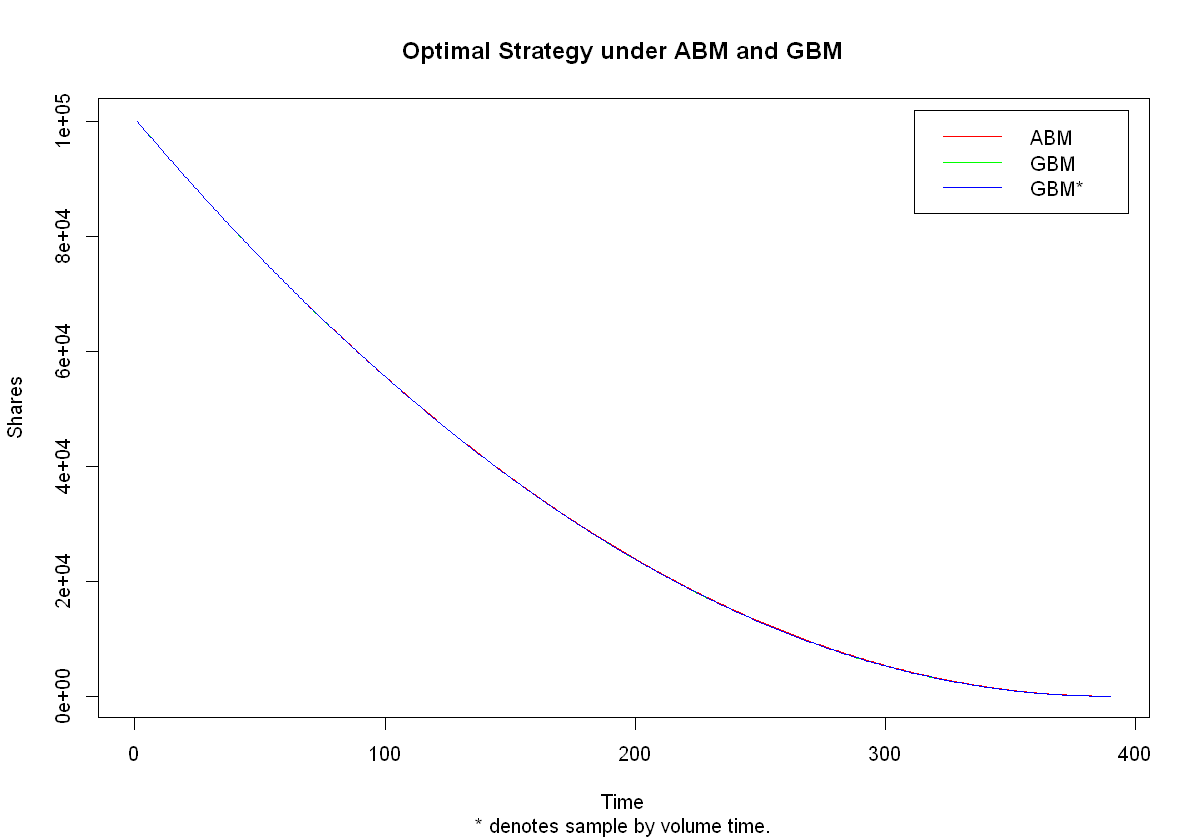

In [5]:
# Plot results
plot(1:T, (1:T)*N/T, type="n", xlab="Time", ylab="Shares", 
     main="Optimal Strategy under ABM and GBM", sub="* denotes sample by volume time.")
lines(xa, col="red")
lines(xg, col="green")
lines(xgv, col="blue")
legend("topright", c("ABM","GBM","GBM*"), col=c("red","green","blue"), lty=1, inset=0.02)

In [6]:
# Difference between sample methods
print(paste("maxium deviation =", floor(max(abs(xg-xgv)))))

[1] "maxium deviation = 11"


Maxium deviation between evenly sample and sample by volume time is only 11 shares, as a result, the difference between two sample methods can be neglected.

(b)

[1] "maxium deviation = 130"


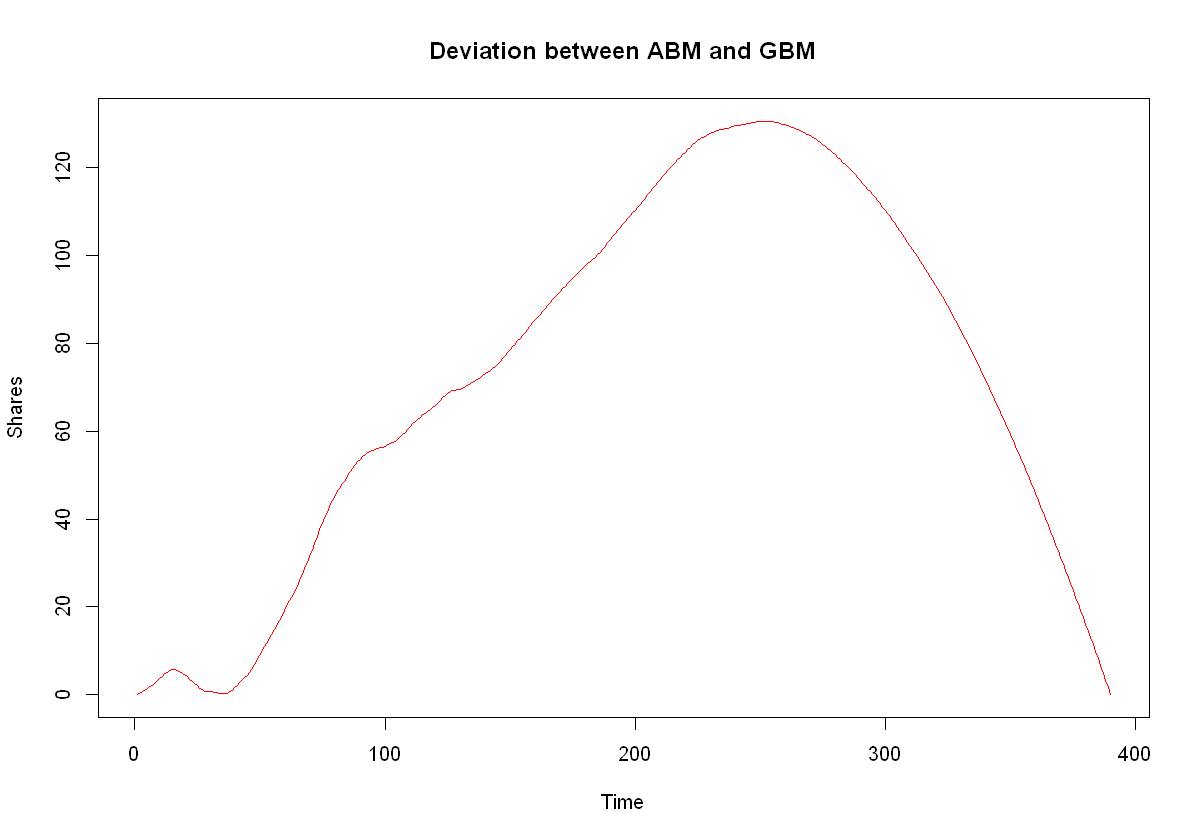

In [7]:
# Find deviation
xdelta=abs(xg-xa)
plot(1:390, xdelta, col="red", type="l", xlab="Time", ylab="Shares", main="Deviation between ABM and GBM")
print(paste("maxium deviation =", floor(max(xdelta))))

Clearly, the deviation between ABM and GBM is quite unsignificant compared to the total quantity of shares (about $0.12\%$).

## Kratz and Schöneborn with time-averaged VaR risk charge

### 3. (12 points)

(a) Repeat the computation of the optimal strategy from the lecture notes with time-averaged VaR

$$
\lambda\,\sigma\,\int_0^T\,x_t\,dt
$$

as the risk term (rather than the quadratic variation $\lambda\,\sigma^2\,\int_0^T\,x_t^2\,dt$).  Show that the optimal position

$$
x^\star(t)=\left(X-\frac{A\, T}{\theta }\right)\,\frac{1-e^{-\theta\,(T-t)} }{1-e^{-\theta\,T }}+\frac{A }{\theta }\,(T-t)
$$
and deduce the optimal trading rate $v^\star(t)$.

(b) By Taylor-expanding the solution around $\theta=0$, show that we retrieve the solution derived in the slides with no dark pool

$$
x^\star(t)=\left(X-\frac{A \, T}{2}\,t\right)\,\left(1-\frac{t}{T}\right) .
$$

in the limit $\theta \to 0$.


### Solution

(a)

From the lecture we know that the Kratz-Schoneborn Hamilton-Jacobi-Bellman equation is

$$
\mathcal{C}_t + \lambda \sigma x + \inf_{v\in\mathcal{G}} \left\{ \eta v_t^2 - v_t \mathcal{C}_x +\theta \left[ \mathcal{C}(x_t-y_t)-\mathcal{C}(x_t) \right] \right\} = 0
$$

The optimal value of $y_t$ is obviously $y_t^\star=x_t$

The first order condition of $v_t^\star$ is
$$
\frac {\partial} {\partial v_t} \left\{\eta v_t^2 - v_t \mathcal{C}_x +\theta \left[ \mathcal{C}(x_t-y_t)-\mathcal{C}(x_t) \right] \right\} = 0
$$

By solving the equation above, we obtain
$$
v_t^\star = \frac {\mathcal{C}_x} {2 \eta}
$$

Substitute $y_t^\star$ and $v_t^\star$ back into the Hamilton-Jacobi-Bellman equation, we shall have
$$
\mathcal{C}_t + \lambda \sigma x + \eta {\left(\frac {\mathcal{C}_x} {2 \eta}\right)}^2 - \frac {\mathcal{C}_x} {2 \eta} \mathcal{C}_x -\theta \mathcal{C} = 0 \\ 
\mathcal{C}_t = \frac {\mathcal{C}_x^2} {4 \eta} - \lambda \sigma x +\theta \mathcal{C}
$$


Here we shall solve the Hamilton-Jacobi-Bellman equaiton with the ansatz 

$$
\mathcal{C}(t,x) = \eta \left[ a(t) x^2 + b(t) x + c(t) \right]
$$

Firstly, calculate the partial differentiations, we have

$$
\begin{split}
\mathcal{C}_t &= \eta {\left(a' x^2 + b' x + c' \right)} \\
\mathcal{C}_x &= \eta {\left( a x + b \right)}
\end{split}
$$

Then, substitute the partial differentiations into the HJB equation.

$$
\eta {\left(a' x^2 + b' x + c' \right)} = \frac {\eta^2 {\left(2 a x + b \right)}^2} {4 \eta} - \lambda \sigma x + \theta\eta \left( a x^2 + b x + c \right)
$$

Compare the coefficients, we can obtain the following system of ordinary differential equations.

$$
\begin{cases}
x^2: \eta a' - \eta a^2 - \theta\eta a = 0 \\ 
x: \eta b' - \eta a b - \theta\eta b + \lambda \sigma = 0 \\ 
1: \eta c' - \frac {\eta} {4} b^2 - \theta\eta c = 0
\end{cases}
$$

Solve these equations, we have

$$
\begin{split}
a(t) &= -\frac {\theta} {1-e^{\theta(T-t)}} \\ 
b(t) &= 2A \left[ \frac {(T-t)} {1-e^{\theta(T-t)}} + \frac{1}{\theta} \right]
\end{split}
$$

where

$$
A = \frac {\lambda \sigma} {2\eta}
$$

Finally, substitute all parameters back to the expression of $v^\star(t)$, we can get the ODE for $x^\star(t)$.

$$
v^\star(t) = \frac {\mathcal{C}_x} {2 \eta} = \frac { \eta \left(2 a(t) x^\star(t) + b(t) \right)} {2 \eta} = -\dot{x}^\star(t)
$$

Solving the ODE leads to

$$
x^\star(t)=\left(X-\frac{AT}{\theta}\right) \frac{1-e^{-\theta(T-t)}}{1-e^{-\theta T }}+\frac{A}{\theta} (T-t)
$$

And the optimal trading rate is

$$
v^\star(t)=-\dot{x}^\star(t)=\left(X-\frac{AT}{\theta}\right) \frac{\theta e^{-\theta(T-t)}}{1-e^{-\theta T }}+\frac{A}{\theta} 
$$

(b)

By Taylor-expanding the solution around $\theta=0$, we have

$$
\begin{split}
x^\star(t)&\approx\left(X-\frac{AT}{\theta}\right) \frac{(T-t)-\frac12 \theta (T-t)^2}{T-\frac12 \theta T^2} + \frac{A}{\theta} (T-t) \\
&=X \frac{(T-t)-\frac12 \theta (T-t)^2}{T-\frac12 \theta T^2} - A(T-t) \frac{\frac12 t}{1-\frac12 \theta T}
\end{split}
$$

Let $\theta\to 0$, we shall obtain

$$
\lim_{\theta\to 0}x^\star(t)=X \frac{(T-t)}{T} - \frac12 A(T-t) t = \left(X-\frac{AT}{2} t\right) \left(1-\frac{t}{T}\right)
$$